# Computer Vision Models, Learning and Inference
## Chapter 4 algorithms, implemented in python

Adapted from matlab code by Stefan Stavrev.<br>
Book: http://www.computervisionmodels.com/ <br>
Code: http://www.cs.ucl.ac.uk/external/s.prince/book/CVM.rar

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.special import gamma as Gamma
import matplotlib.pyplot as plt

# Example 4.1

Method for maximum likelyhood estimation.

In [2]:
def mle_norm(data):
    l = len(data)
    mu = np.sum(data) / l
    var = np.sum((data-mu)**2) / l
    
    return mu, var

In [3]:
def get_norm_data(mu, sigma, size):
    return mu + sigma * np.random.normal(size=size)

Generate 100 values from the normal distribution.

In [4]:
original_mu = 5
original_sigma = 8
r_100 = get_norm_data(original_mu, original_sigma, 100)

Estimate $\mu$ and $\sigma$.

In [5]:
est_mu_mle, est_var_mle = mle_norm(r_100)
est_sig_mle = np.sqrt(est_var_mle)
print("Estimated mu: {}".format(est_mu_mle))
print("Estimated sigma: {}".format(est_sig_mle))

Estimated mu: 4.1794326528142145
Estimated sigma: 8.600278326829836


Find error between original and estimated.

In [6]:
mu_error_mle = abs(original_mu - est_mu_mle)
sig_error_mle = abs(original_sigma - est_sig_mle)
print("mu error: {}".format(mu_error_mle))
print("sigma error: {}".format(sig_error_mle))

mu error: 0.8205673471857855
sigma error: 0.6002783268298355


Generate some data for plotting.

In [7]:
x = np.arange(-20, 30, 0.01)
original = stats.norm.pdf(x, original_mu, original_sigma)
estimated_mle = stats.norm.pdf(x, est_mu_mle, est_sig_mle)

Plot normal distributions based on original and estimated parameters.

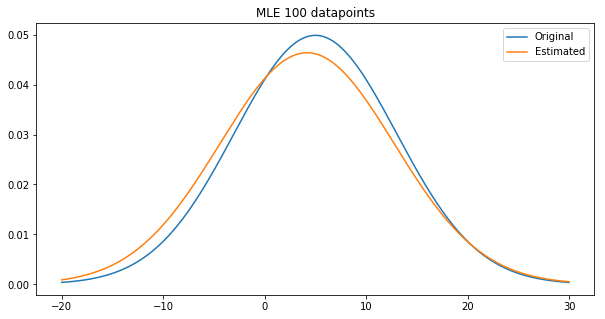

In [8]:
f = plt.figure(figsize=(10, 5))
plt.plot(x, original, label='Original')
plt.plot(x, estimated_mle, label='Estimated')
plt.title("MLE 100 datapoints")
plt.legend()
plt.show()

# Example 4.2

Method for Maximum a posteriori estimation.

In [9]:
def map_norm(data, alpha, beta, gamma, delta):
    I = len(data)
    mu = (np.sum(data) + gamma*delta) / (I + gamma)
    var_up = np.sum((data - mu)**2) + 2 + beta + gamma * (delta - mu)**2
    var_down = I + 3 + 2 * alpha
    var = var_up / var_down
    
    return mu, var

Datasizes to evaluate on.

In [10]:
data_sizes = [5, 30, 1000, 1000000]

Generate an array with data.

In [11]:
data_points = []
for ds in data_sizes:
    data_points.append(get_norm_data(original_mu, original_sigma, ds))

Parameters for MaP estimation

In [12]:
alpha = 1
beta = 1
gamma = 1
delta = 0

Estimate $\mu$ and $\sigma$ for each distribution defined by the data_sizes array.

In [13]:
estimates_map = np.zeros((len(data_points), 2))
estimates_mle = np.zeros((len(data_points), 2))

for c, dp in enumerate(data_points):
    e_mu_map, e_var_map = map_norm(dp, alpha, beta, gamma, delta)
    e_sig_map = np.sqrt(e_var_map)
    e_mu_mle, e_var_mle = mle_norm(dp)
    e_sig_mle = np.sqrt(e_var_mle)
    estimates_map[c][0] = e_mu_map
    estimates_map[c][1] = e_sig_map
    estimates_mle[c][0] = e_mu_mle
    estimates_mle[c][1] = e_sig_mle
    print("Estimated mu at {} datapoints: {}".format(len(dp), e_mu_map))
    print("Estimated sigma at {} datapoints: {}".format(len(dp), e_sig_map))
    print("")

Estimated mu at 5 datapoints: 2.2889706271566377
Estimated sigma at 5 datapoints: 2.907297327380822

Estimated mu at 30 datapoints: 5.485759709201173
Estimated sigma at 30 datapoints: 6.627323964168221

Estimated mu at 1000 datapoints: 4.871605876145546
Estimated sigma at 1000 datapoints: 8.251079908519943

Estimated mu at 1000000 datapoints: 4.999006430374298
Estimated sigma at 1000000 datapoints: 7.999442616125876



Display $\mu$ and $\sigma$ error based on data points.

In [14]:
for c, est in enumerate(estimates_map):
    mu_err = abs(original_mu - est[0])
    sig_err = abs(original_sigma - est[1])
    print("Map mu error at {} datapoints: {}".format(len(data_points[c]), mu_err))
    print("Map sigma error at {} datapoints: {}".format(len(data_points[c]), sig_err))
    print("")

Map mu error at 5 datapoints: 2.7110293728433623
Map sigma error at 5 datapoints: 5.092702672619178

Map mu error at 30 datapoints: 0.4857597092011732
Map sigma error at 30 datapoints: 1.3726760358317787

Map mu error at 1000 datapoints: 0.12839412385445392
Map sigma error at 1000 datapoints: 0.25107990851994266

Map mu error at 1000000 datapoints: 0.0009935696257024063
Map sigma error at 1000000 datapoints: 0.0005573838741241843



Generate some data to do plotting.

In [15]:
map_plot_data = []
mle_plot_data = []

for est_mle, est_map in zip(estimates_mle, estimates_map):
    mle_plot_data.append(stats.norm.pdf(x, est_mle[0], est_mle[1]))
    map_plot_data.append(stats.norm.pdf(x, est_map[0], est_map[1]))

Plot the estimated distributions.

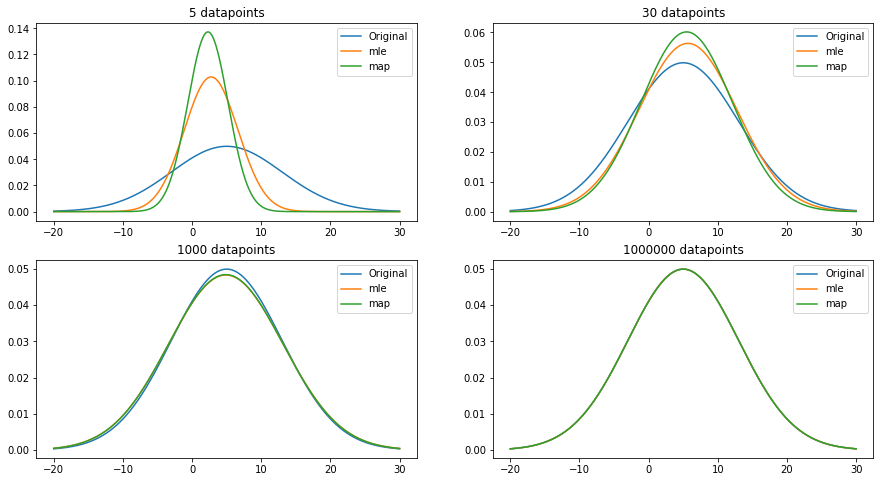

In [16]:
f, subs = plt.subplots(2, 2, figsize=(15, 8))
subs = subs.ravel()

for c, (mle_plot, map_plot) in enumerate(zip(mle_plot_data, map_plot_data)):
    subs[c].plot(x, original, label='Original')
    subs[c].plot(x, mle_plot_data[c], label='mle')
    subs[c].plot(x, map_plot_data[c], label='map')
    subs[c].set_title("{} datapoints".format(data_sizes[c]))
    subs[c].legend()

# Example 4.3

In [17]:
original_mu = 5
original_sigma = 8
r_5 = get_norm_data(original_mu, original_sigma, 5)
r_100 = get_norm_data(original_mu, original_sigma, 100)

In [18]:
x_test = np.arange(-20, 30, 0.01)

In [19]:
def by_norm(x, alpha_prior, beta_prior, gamma_prior, delta_prior, x_test):
    I = len(x)
    alpha_post = alpha_prior + I / 2
    beta_post = np.sum(x**2) / 2 + beta_prior + (gamma_prior * delta_prior**2) / 2 - (gamma_prior*delta_prior + np.sum(x))**2 / (2 * (gamma_prior + I))
    gamma_post = gamma_prior + I
    delta_post = (gamma_prior * delta_prior + np.sum(x)) / (gamma_prior + I)
    alpha_int = alpha_post + 0.5
    beta_int = (x_test**2) / 2 + beta_post + (gamma_post * delta_post**2) / 2 - (gamma_post * delta_post + x_test) ** 2 / (2 * gamma_post + 2)
    gamma_int = gamma_post + 1
    nume = np.sqrt(gamma_post) * (beta_post**alpha_post) * Gamma(alpha_int)
    denom = np.sqrt(gamma_int) * (beta_int**alpha_int) * Gamma(alpha_post)
    x_prediction = (1 / np.sqrt(2 * np.pi)) * nume / denom
    
    return alpha_post, beta_post, gamma_post, delta_post, x_prediction

In [20]:
alpha_post_5, beta_post_5, gamma_post_5, delta_post_5, x_prediction_5 = by_norm(r_5, 1, 1, 1, 0, x_test)
alpha_post_100, beta_post_100, gamma_post_100, delta_post_100, x_prediction_100 = by_norm(r_100, 1, 1, 1, 0, x_test)

In [21]:
map_mu_5, map_var_5 = map_norm(r_5, alpha, beta, gamma, delta)
map_sig_5 = np.sqrt(map_var_5)
map_mu_100, map_var_100 = map_norm(r_100, alpha, beta, gamma, delta)
map_sig_100 = np.sqrt(map_var_100)

map_data_5 = stats.norm.pdf(x_test, map_mu_5, map_sig_5)
map_data_100 = stats.norm.pdf(x_test, map_mu_100, map_sig_100)

In [22]:
original_data = stats.norm.pdf(x_test, original_mu, original_sigma)

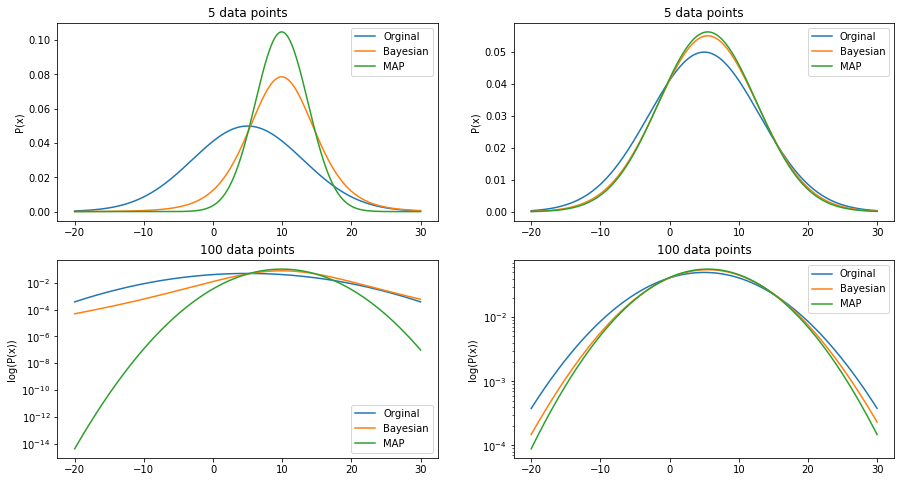

In [23]:
f, subs = plt.subplots(2, 2, figsize=(15, 8))
subs = subs.ravel()

subs[0].set_ylabel('P(x)')
subs[0].plot(x_test, original_data, label='Orginal')
subs[0].plot(x_test, x_prediction_5, label='Bayesian')
subs[0].plot(x_test, map_data_5, label='MAP')
subs[0].set_title("5 data points")
subs[0].legend()

subs[1].set_ylabel('P(x)')
subs[1].plot(x_test, original_data, label='Orginal')
subs[1].plot(x_test, x_prediction_100, label='Bayesian')
subs[1].plot(x_test, map_data_100, label='MAP')
subs[1].set_title("5 data points")
subs[1].legend()

subs[2].set_yscale('log')
subs[2].set_ylabel('log(P(x))')
subs[2].plot(x_test, original_data, label='Orginal')
subs[2].plot(x_test, x_prediction_5, label='Bayesian')
subs[2].plot(x_test, map_data_5, label='MAP')
subs[2].set_title("100 data points")
subs[2].legend()

subs[3].set_yscale('log')
subs[3].set_ylabel('log(P(x))')
subs[3].plot(x_test, original_data, label='Orginal')
subs[3].plot(x_test, x_prediction_100, label='Bayesian')
subs[3].plot(x_test, map_data_100, label='MAP')
subs[3].set_title("100 data points")
subs[3].legend()

# Example 4.4

In [24]:
def mle_cat(x):
    K = x.shape[1]
    ret = np.zeros(K)
    arg_max = np.argmax(x, axis=1)
    for i in range(K):
        count = np.count_nonzero(arg_max == i)
        ret[i] = count / len(x)
    return ret

In [25]:
original_probabilities = [0.25, 0.15, 0.1, 0.1, 0.15, 0.25]
r_1 = np.random.multinomial(1, original_probabilities, size=200)
r_2 = np.random.multinomial(1, original_probabilities, size=20000)

In [26]:
estimated_1 = mle_cat(r_1)
estimated_2 = mle_cat(r_2)
print(estimated_1)
print(estimated_2)

[0.285 0.14  0.09  0.08  0.16  0.245]
[0.24995 0.1508  0.0952  0.1005  0.15235 0.2512 ]


<BarContainer object of 6 artists>

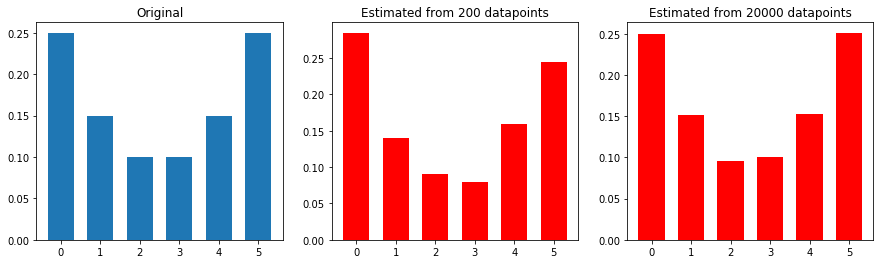

In [27]:
f, subs = plt.subplots(1, 3, figsize=(15, 4))
subs = subs.ravel()

N = len(original_probabilities)
x = range(N)
width = 1/1.5

subs[0].set_title("Original")
subs[0].bar(x, original_probabilities, width)
subs[1].set_title("Estimated from {} datapoints".format(len(r_1)))
subs[1].bar(x, estimated_1, width, color='red')
subs[2].set_title("Estimated from {} datapoints".format(len(r_2)))
subs[2].bar(x, estimated_2, width, color='red')

# Example 4.5

Numpy has a method to sample from the dirilecht distribution. Might still be interesting to implement, I haven't done that though.

In [28]:
r_1_dir = np.random.dirichlet([1, 1, 1, 1, 1, 1], 3)
r_2_dir = np.random.dirichlet([1000, 1000, 1000, 1000, 1000, 1000], 3)
r_3_dir = np.random.dirichlet([10, 100, 1000, 1000, 100, 10], 3)

<BarContainer object of 6 artists>

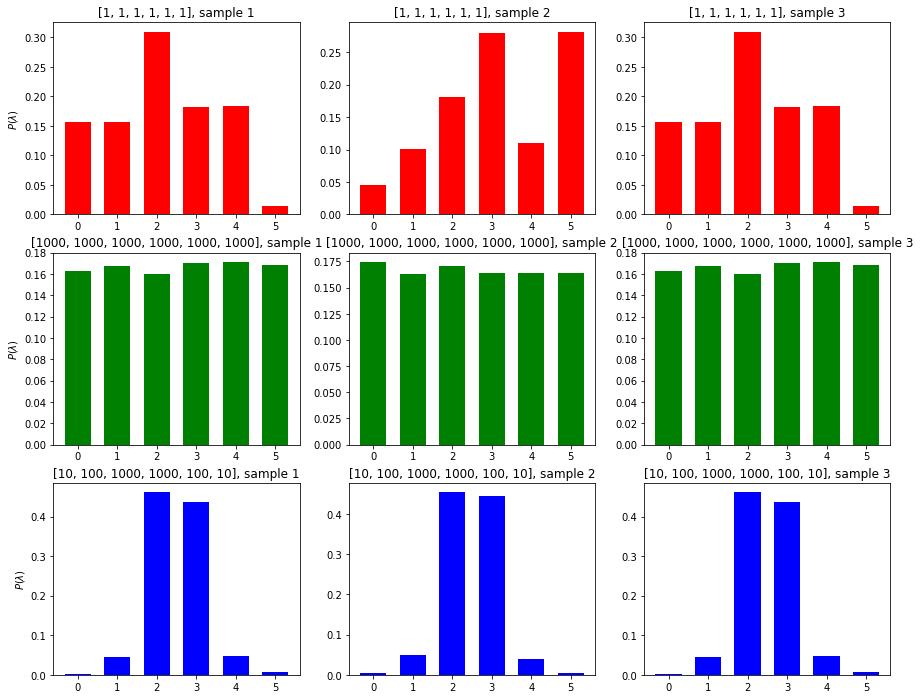

In [29]:
f, subs = plt.subplots(3, 3, figsize=(15, 12))
#subs = subs.ravel()

N = len(r_1[0])
x = range(N)
width = 1/1.5

subs[0][0].set_ylabel("$P(\lambda)$")
subs[0][0].set_title("[1, 1, 1, 1, 1, 1], sample 1")
subs[0][0].bar(x, r_1_dir[0], width, color='red')
subs[0][1].set_title("[1, 1, 1, 1, 1, 1], sample 2")
subs[0][1].bar(x, r_1_dir[1], width, color='red')
subs[0][2].set_title("[1, 1, 1, 1, 1, 1], sample 3")
subs[0][2].bar(x, r_1_dir[0], width, color='red')

subs[1][0].set_ylabel("$P(\lambda)$")
subs[1][0].set_title("[1000, 1000, 1000, 1000, 1000, 1000], sample 1")
subs[1][0].bar(x, r_2_dir[0], width, color='green')
subs[1][1].set_title("[1000, 1000, 1000, 1000, 1000, 1000], sample 2")
subs[1][1].bar(x, r_2_dir[1], width, color='green')
subs[1][2].set_title("[1000, 1000, 1000, 1000, 1000, 1000], sample 3")
subs[1][2].bar(x, r_2_dir[0], width, color='green')

subs[2][0].set_ylabel("$P(\lambda)$")
subs[2][0].set_title("[10, 100, 1000, 1000, 100, 10], sample 1")
subs[2][0].bar(x, r_3_dir[0], width, color='blue')
subs[2][1].set_title("[10, 100, 1000, 1000, 100, 10], sample 2")
subs[2][1].bar(x, r_3_dir[1], width, color='blue')
subs[2][2].set_title("[10, 100, 1000, 1000, 100, 10], sample 3")
subs[2][2].bar(x, r_3_dir[0], width, color='blue')

function [theta] = mle_cat (x, K)
 [counts] = hist(x, 1:K);
 theta = counts ./ sum(counts);
end

In [30]:
def map_cat(x, alpha):
    #I = x.shape[0]
    K = x.shape[1]
    ret = np.zeros(K)
    arg_max = np.argmax(x, axis=1)
    for i in range(K):
        count = np.count_nonzero(arg_max == i)
        ret[i] = (count - 1 + alpha[i]) / (len(x) + np.sum(alpha) - K)
    
    return ret

In [31]:
r_1 = np.random.multinomial(1, original_probabilities, size=200)
r_2 = np.random.multinomial(1, original_probabilities, size=2000)
r_3 = np.random.multinomial(1, original_probabilities, size=200000)

In [32]:
est_mle_2 = mle_cat(r_2)

In [33]:
prior = np.array([1, 1, 1, 1, 1, 1])
est_map_2 = map_cat(r_2, prior)

<BarContainer object of 6 artists>

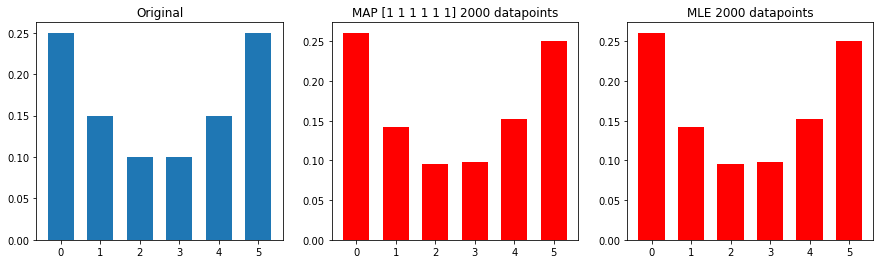

In [34]:
f, subs = plt.subplots(1, 3, figsize=(15, 4))

N = len(original_probabilities)
x = range(N)
width = 1/1.5

subs[0].set_title("Original")
subs[0].bar(x, original_probabilities, width)
subs[1].set_title("MAP [1 1 1 1 1 1] {} datapoints".format(len(r_2)))
subs[1].bar(x, est_map_2, width, color='red')
subs[2].set_title("MLE {} datapoints".format(len(r_2)))
subs[2].bar(x, est_mle_2, width, color='red')

In [35]:
prior = np.array([10, 100, 1000, 1000, 100, 10])
est_map_1 = map_cat(r_1, prior)
est_map_2 = map_cat(r_2, prior)
est_map_3 = map_cat(r_3, prior)

<BarContainer object of 6 artists>

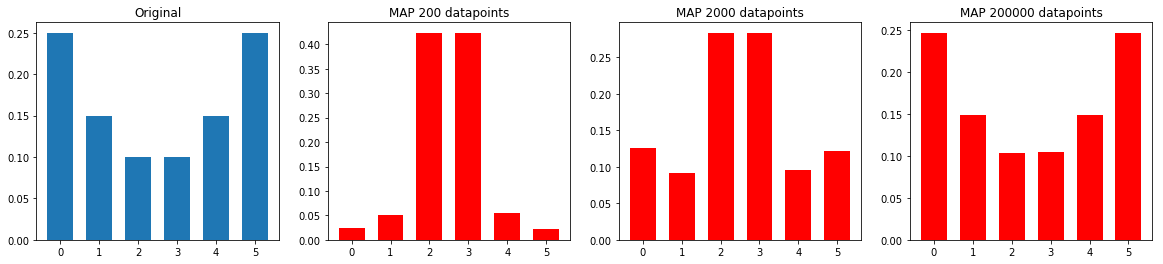

In [36]:
f, subs = plt.subplots(1, 4, figsize=(20, 4))

N = len(original_probabilities)
x = range(N)
width = 1/1.5

subs[0].set_title("Original")
subs[0].bar(x, original_probabilities, width)
subs[1].set_title("MAP {} datapoints".format(len(r_1)))
subs[1].bar(x, est_map_1, width, color='red')
subs[2].set_title("MAP {} datapoints".format(len(r_2)))
subs[2].bar(x, est_map_2, width, color='red')
subs[3].set_title("MAP {} datapoints".format(len(r_3)))
subs[3].bar(x, est_map_3, width, color='red')

# Example 4.6

In [43]:
def by_cat(x, alpha_prior):
    K = len(alpha_prior)
    counts = np.zeros(K)
    arg_max = np.argmax(x, axis=1)
    for i in range(K):
        counts[i] = np.count_nonzero(arg_max == i)
    alpha_post = alpha_prior + counts
    prediction = alpha_post / np.sum(alpha_post)
    
    return prediction

In [75]:
r_1 = np.random.multinomial(1, original_probabilities, size=15)
r_2 = np.random.multinomial(1, original_probabilities, size=1000000)

In [76]:
prior = np.array([1, 1, 1, 1, 1, 1])
est_map_1 = map_cat(r_1, prior)
est_map_2 = map_cat(r_2, prior)

In [77]:
est_by_1 = by_cat(r_1, prior)
est_by_2 = by_cat(r_2, prior)

<BarContainer object of 6 artists>

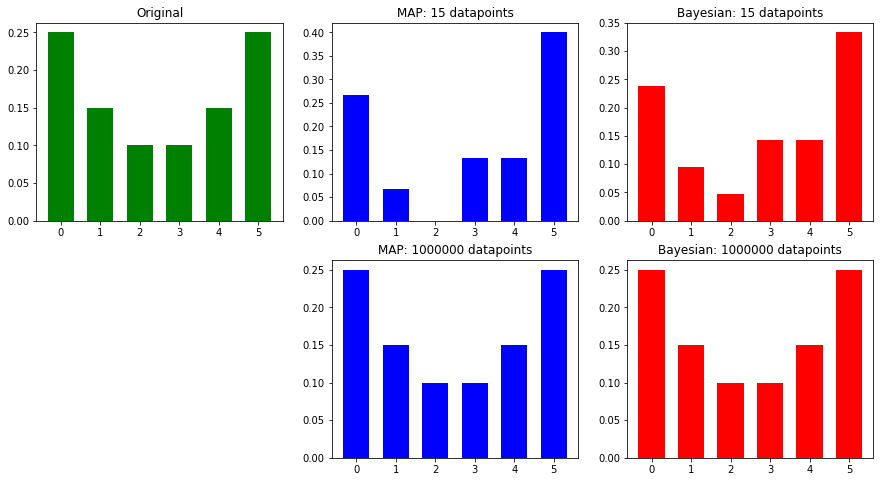

In [78]:
f, subs = plt.subplots(2, 3, figsize=(15, 8))

N = len(original_probabilities)
x = range(N)
width = 1/1.5

subs[1][0].set_visible(False)

subs[0][0].set_title("Original")
subs[0][0].bar(x, original_probabilities, width, color='green')

subs[0][1].set_title("MAP: {} datapoints".format(len(r_1)))
subs[0][1].bar(x, est_map_1, width, color='blue')

subs[0][2].set_title("Bayesian: {} datapoints".format(len(r_1)))
subs[0][2].bar(x, est_by_1, width, color='red')

subs[1][1].set_title("MAP: {} datapoints".format(len(r_2)))
subs[1][1].bar(x, est_map_2, width, color='blue')

subs[1][2].set_title("Bayesian: {} datapoints".format(len(r_2)))
subs[1][2].bar(x, est_by_2, width, color='red')